In [11]:
#!pip install pyforest 
#pip install --upgrade pyforest
#pip install --upgrade openpyxl
#pip install PyQt5

import pandas as pd
import numpy as np


import ffn as ffn
import seaborn as sns


import tkinter
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
#matplotlib.use('TkAgg')
# set chart styles

sns.set(rc={'figure.figsize':(13.7,8.27)})
sns.set_style("darkgrid", {"grid.color": ".6", "grid.linestyle": ":"})


In [12]:
FILE_NAV = 'rawdata/nav-series.xlsx'
FILE_FLOWS = 'rawdata/net-flows.xlsx'
nav = pd.read_excel(FILE_NAV)
flows = pd.read_excel(FILE_FLOWS, sheet_name=1)


#create index on pricing_date
nav['PRICING_DATE']=pd.to_datetime(nav['PRICING_DATE'])
nav.set_index('PRICING_DATE', inplace=True)
nav.sort_index(inplace=True)
nav

,ISIN_CODE,NAV_ADJUSTED,RISK_FREE_RATE,ISO_ALPHA_3,NAV,BENCH_LEVEL
PRICING_DATE,,,,,,
2008-09-29,LU0340557775,100.00,152.4496,USD,100.00,114.495100
2008-09-30,LU0340557775,100.06,152.4619,USD,100.06,116.346400
2008-10-01,LU0340557775,99.99,152.4760,USD,99.99,116.506200
2008-10-02,LU0340557775,96.67,152.4902,USD,96.67,112.322200
2008-10-03,LU0340557775,94.25,152.5043,USD,94.25,111.816300
...,...,...,...,...,...,...
2022-12-08,LU0340557775,222.09,172.7607,USD,222.09,325.124317
2022-12-09,LU0340557775,223.19,172.7813,USD,223.19,324.669558
2022-12-12,LU0340557775,220.58,172.8433,USD,220.58,326.366931


In [13]:
flows

,Valuation Year,Valuation Month,NET (USD)
0,2008,9,0.000000e+00
1,2008,10,0.000000e+00
2,2008,11,0.000000e+00
3,2008,12,0.000000e+00
4,2009,1,0.000000e+00
...,...,...,...
166,2022,7,-3.281582e+07
167,2022,8,-2.259016e+07
168,2022,9,-4.875771e+07
169,2022,10,-2.435833e+07


In [14]:
df = ffn.core.to_monthly(nav)
df['FLOWS']=flows['NET (USD)'].values
df

,ISIN_CODE,NAV_ADJUSTED,RISK_FREE_RATE,ISO_ALPHA_3,NAV,BENCH_LEVEL,FLOWS
PRICING_DATE,,,,,,,
2008-09-30,LU0340557775,100.06,152.4619,USD,100.06,116.346400,0.000000e+00
2008-10-31,LU0340557775,77.66,152.9013,USD,77.66,93.291900,0.000000e+00
2008-11-28,LU0340557775,66.40,153.3218,USD,66.40,87.163090,0.000000e+00
2008-12-30,LU0340557775,67.37,153.7667,USD,67.37,89.924030,0.000000e+00
2009-01-30,LU0340557775,62.53,154.1039,USD,62.53,82.605470,0.000000e+00
...,...,...,...,...,...,...,...
2022-07-29,LU0340557775,227.90,170.9020,USD,227.90,332.213566,-3.281582e+07
2022-08-31,LU0340557775,220.88,171.2222,USD,220.88,319.983157,-2.259016e+07
2022-09-30,LU0340557775,192.87,171.5990,USD,192.87,289.351393,-4.875771e+07


# Dataset
df is the merged dataset with 3 columns on the portfolio prices (NAV, RISK_FREE_RATE, BENCHMARK LEVEL).
ISIN_CODE and CURRENCY are no longer needed.
FLOWS contains the monthly sum of flows (in or out).

df has been resampled to monthly position to match the flows.

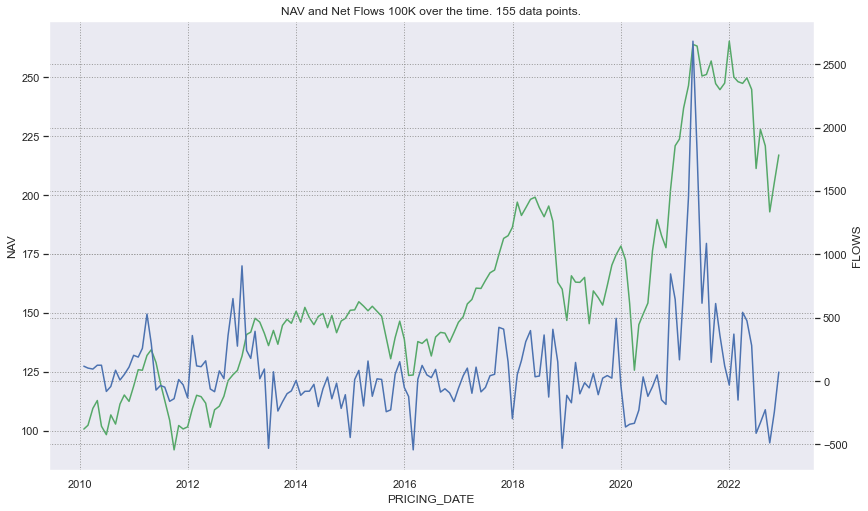

In [27]:
# plot NAV and FLOWS
# drop data before 2010 because FLOWS are flat
df = df['2010':].copy()
try:
    df.drop(['ISIN_CODE','ISO_ALPHA_3'], axis=1, inplace=True)
except Exception as e:
    pass
#save this dataset in a file
FILE = 'data/datset.csv'
df.to_csv(FILE)

#------------------ PLOT -------------------------------
sns.lineplot(data=df,x=df.index,y='NAV', color='g')
ax2 = plt.twinx()
sns.lineplot(data=df.FLOWS/100000, color="b", ax=ax2)
plt.title(f'NAV and Net Flows 100K over the time. {df.shape[0]} data points.')
plt.show();